In [1]:
from pydynverse.wrap import wrap_expression, infer_trajectory, add_dimred, add_prior_information
from pydynverse.methods import ti_comp1, ti_slingshot, ti_monocle_ddrtree, ti_mst, ti_scuba, ti_angle, ti_grandprix, ti_paga
from pydynverse.plot import plot_dimred
from pydynverse.dimred import dimred_mds

from pydynverse import logger

logger.setLevel("DEBUG")

In [2]:
# 1. 准备数据(wrap)
# 运行R脚本获得数据，为R对象
import rpy2.robjects as ro
from pydynverse.util import rpy2_read # 导入对应的装饰器， 实现数据自动转换
r_script = """
library(dyno)
data("fibroblast_reprogramming_treutlein")
fibroblast_reprogramming_treutlein
"""
fibroblast_reprogramming_treutlein = ro.r(r_script)

# 封装数据
dataset = wrap_expression(
    counts=fibroblast_reprogramming_treutlein["counts"],
    expression=fibroblast_reprogramming_treutlein["expression"]
)
logger.info(f"AnnData dataset:\n{dataset}")
logger.info("Dataset loading finished")

R[write to console]: 载入需要的程辑包：dynfeature

R[write to console]: 载入需要的程辑包：dynguidelines

R[write to console]: 载入需要的程辑包：dynmethods

R[write to console]: 载入需要的程辑包：dynplot

R[write to console]: 载入需要的程辑包：dynwrap



[2024年12月09日 19时33分36秒] DEBUG    Dataset created: {'id': '20241209_193336__data_wrapper__rKMdpqYzmC',        
                                       'cell_ids': ['1_iN1_C01', '1_iN1_C02', '1_iN1_C03', '1_iN1_C04',            
                                       '1_iN1_C05', '1_iN1_C07', '1_iN1_C08', '1_iN1_C09', '1_iN1_C10',            
                                       '1_iN1_C11', '1_iN1_C12', '1_iN1_C13', '1_iN1_C14', '1_iN1_C15',            
                                       '1_iN1_C16', '1_iN1_C17', '1_iN1_C19', '1_iN1_C20', '1_iN1_C21',            
                                       '1_iN1_C22', '1_iN1_C23', '1_iN1_C25', '1_iN1_C26', '1_iN1_C27',            
                                       '1_iN1_C29', '1_iN1_C30', '1_iN1_C31', '1_iN1_C33', '1_iN1_C34',            
                                       '1_iN1_C35', '1_iN1_C36', '1_iN1_C37', '1_iN1_C38', '1_iN1_C40',            
                                       '1_iN1_C41', '1_iN1_C42', '1_iN1_C43', 

In [3]:
# 2. 选择方法(method), 目前stuba和grandprix有点问题
# methods_selected_list = [ti_comp1(), ti_slingshot(), ti_monocle_ddrtree(), ti_mst(), ti_scuba(), ti_angle(), ti_grandprix()]
# methods_selected_list = [ti_slingshot()]
# methods_selected = methods_selected_list[0]

# 字典方式调用，方便后续保存json文件
# 每类wrapper选择一种方法
method_type_dict = {
    # type2method
    "trajectory": {
        "name": "slingshot",  # 轨迹推断方法名称
        "function": ti_slingshot,  # 轨迹方法函数名，不直接调用
    },
    "linear_trajectory": {
        "name": "comp1",
        "function": ti_comp1,
    },
    "cycle": {
        "name": "angle",
        "function": ti_angle,
    },
    "end_state_probabilities": {
        "name": "grandprix",
        "function": ti_grandprix,
    },
    "cluster_graph": {
        "name": "scuba",
        "function": ti_scuba,
    },
    "dimred_projection": {
        "name": "mst",
        "function": ti_mst,
    },
    "cell_graph": {
        "name": "monocle_ddrtree",
        "function": ti_monocle_ddrtree,
    },
}

method_type = "linear_trajectory" # 此处选择方法的wrapper类型
methods_selected = method_type_dict[method_type]["function"]()

logger.info(f"Methods {methods_selected} selecting finished")

                        DEBUG    Docker image(dynverse/ti_comp1:v0.9.9.01) loaded                                  
                        INFO     Methods {'method': {'id': 'comp1', 'name': 'Component 1', 'source': 'offtheshelf',
                                 'platform': 'R'}, 'wrapper': {'type': 'linear_trajectory', 'topology_inference':  
                                 'fixed', 'trajectory_types': 'linear', 'input_required': 'expression', 'inputs':  
                                 input_id  required        type                                                    
                                 0  expression      True  expression                                               
                                 1      dimred     False   parameter                                               
                                 2        ndim     False   parameter                                               
                                 3   component     False   parameter}, '

In [4]:
# 3. 运行方法(wrap)
# add_prior_information(dataset, end_n=3)  # 运行grandprix需要的先验知识
model = infer_trajectory(dataset, methods_selected)
logger.info(f"Methods executing finished, model: {model}")

# # 保存Docker Output输出的json文件
# import json

# method_name = method_type_dict[method_type]["name"]
# json_filename = f"output/24.11.27-quick_docker_output_json/{method_type}_{method_name}.json"
# with open(json_filename, "w") as f:
#     json.dump(model.output_json, f)
# logger.info(f"Docker output json file({json_filename}) save")

                        DEBUG    Temp wd: /tmp/tmplksiuc33                                                         
[2024年12月09日 19时33分37秒] DEBUG    Save json successfully, path: /tmp/tmplksiuc33/input.json                   
                        DEBUG    h52json script:                                                                   
                                 /home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/util/../rscript/docker_i
                                 nput_json2h5.R                                                                    
[2024年12月09日 19时33分38秒] DEBUG    CompletedProcess(args=['/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydyn
                                       verse/util/../rscript/docker_input_json2h5.R', '--input_json_filename',     
                                       '/tmp/tmplksiuc33/input.json', '--input_h5_filename',                       
                                       '/tmp/tmplksiuc33/input.h5'], returncode=0, s

                        INFO     Coloring by grouping                                                              
                        DEBUG    selecting waypoints                                                               
[2024年12月09日 19时33分50秒] DEBUG    selecting waypoints shape is (201, 392), finished!                          
                        INFO     Result plotting finished                                                          


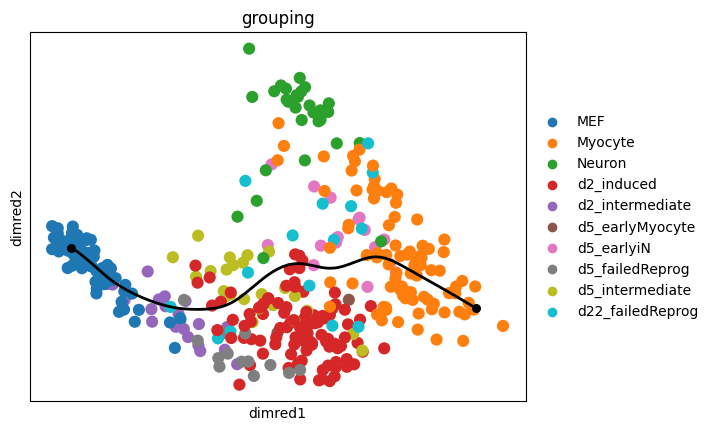

In [5]:
# 4. 绘制轨迹(dimred+plot)
# model = add_dimred(model, dimred_mds,  expression_source=dataset["expression"])  # 提取降维结果, 直接从docker输出容器获得
plot_dimred(model, expression_source=dataset["expression"], grouping=list(fibroblast_reprogramming_treutlein["grouping"]))
logger.info("Result plotting finished")